In [1]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import sqlite3 as sql
import folium
import gmaps
from datetime import datetime
from wordcloud import WordCloud
import scipy.stats as stats

%matplotlib inline

In [2]:
police_2016 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2016_.csv')
police_2016.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,20160000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,300.0,HERRON DR,311C,S,11.0,8125.0,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,20160000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,500.0,MAIN ST,213C,E,11.0,1113.0,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,20160000017,C,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,EDMONDSON PKE & MCMURRAY DR,835C,MT,33.0,8657.0,36.055,-86.743,"(36.055, -86.743)"
3,PD201600000004,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,500.0,S 5TH ST,NaN,E,11.0,1011.0,36.167,-86.762,"(36.167, -86.762)"
4,PD201600000005,01/01/2016 12:00:00 AM,20160000005,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,1100.0,BELL RD,333C,S,25.0,8721.0,36.046,-86.666,"(36.046, -86.666)"


In [3]:
police_2016.shape

(1127959, 19)

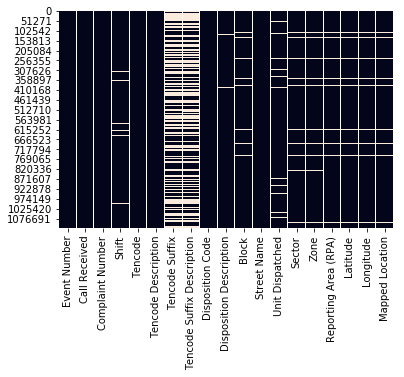

In [4]:
sns.heatmap(police_2016.isnull(), cbar=False)

In [5]:
reduced_police_2016=police_2016[["Event Number","Call Received","Shift","Tencode","Tencode Description","Disposition Code","Disposition Description","Unit Dispatched","Sector","Latitude","Longitude","Mapped Location"]]
reduced_police_2016.head()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,213C,E,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,C,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,835C,MT,36.055,-86.743,"(36.055, -86.743)"
3,PD201600000004,01/01/2016 12:00:00 AM,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,NaN,E,36.167,-86.762,"(36.167, -86.762)"
4,PD201600000005,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,333C,S,36.046,-86.666,"(36.046, -86.666)"


In [6]:
reduced_police_2016.shape

(1127959, 12)

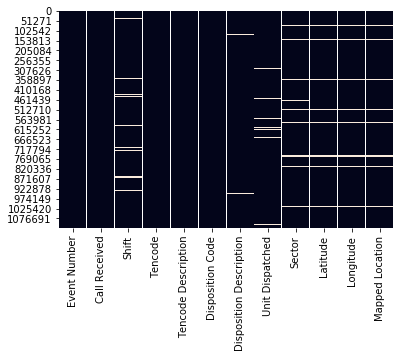

In [7]:
sns.heatmap(reduced_police_2016.isnull(), cbar=False)

In [8]:
new_police_2016=reduced_police_2016.dropna(how='any')
new_police_2016

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,213C,E,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,C,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,835C,MT,36.055,-86.743,"(36.055, -86.743)"
4,PD201600000005,01/01/2016 12:00:00 AM,C,96,Business Check,12,LOCATION/BUILDING SECURE,333C,S,36.046,-86.666,"(36.046, -86.666)"
5,PD201600000006,01/01/2016 12:00:00 AM,C,46,Vehicle Accident - Personal Injury,11,DISREGARD / SIGNAL 9,333C,S,36.054,-86.619,"(36.054, -86.619)"
7,PD201600000008,01/01/2016 12:02:00 AM,C,83,Shots Fired,5,GONE ON ARRIVAL,613C,N,36.179,-86.818,"(36.179, -86.818)"
11,PD201600000012,01/01/2016 12:02:00 AM,C,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,213C,E,36.166,-86.760,"(36.166, -86.76)"
12,PD201600000013,01/01/2016 12:02:00 AM,C,93,Traffic Violation,9,SUBJECT WARNED,721C,M,36.267,-86.746,"(36.267, -86.746)"
13,PD201600000015,01/01/2016 12:03:00 AM,C,83,Shots Fired,10,NO RESPONSE,330C,S,36.072,-86.603,"(36.072, -86.603)"
14,PD201600000016,01/01/2016 12:03:00 AM,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,711C,M,36.235,-86.766,"(36.235, -86.766)"


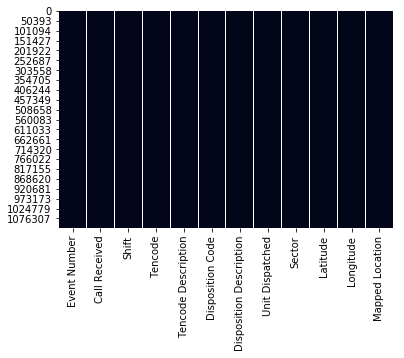

In [9]:
sns.heatmap(new_police_2016.isnull(), cbar=False)

In [10]:
new_police_2016.shape

(973598, 12)

In [11]:
new_police_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973598 entries, 0 to 1127854
Data columns (total 12 columns):
Event Number               973598 non-null object
Call Received              973598 non-null object
Shift                      973598 non-null object
Tencode                    973598 non-null object
Tencode Description        973598 non-null object
Disposition Code           973598 non-null int64
Disposition Description    973598 non-null object
Unit Dispatched            973598 non-null object
Sector                     973598 non-null object
Latitude                   973598 non-null float64
Longitude                  973598 non-null float64
Mapped Location            973598 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 96.6+ MB


In [13]:
new_police_2016["Tencode Description"].value_counts()

Traffic Violation                              258687
Business Check                                 199648
Want Officer for Investigation / Assistance    151452
Community Policing Activity                     49418
Administrative/Special Assignment               46920
Vehicle Accident - Property Damage              35800
Suspicious Person                               34210
Disorderly Person                               31161
Safety Hazard                                   30759
Burglary - Residence                            21730
Burglary - Non-Residence                        19410
Theft                                           13088
Investigate 911 Hang-Up Call                    12144
Vehicle Accident - Personal Injury               9993
Vehicle Blocking Right of Way                    9704
Meal Break                                       7834
Fight / Assault                                  6365
Fixed Post                                       4494
Shots Fired                 

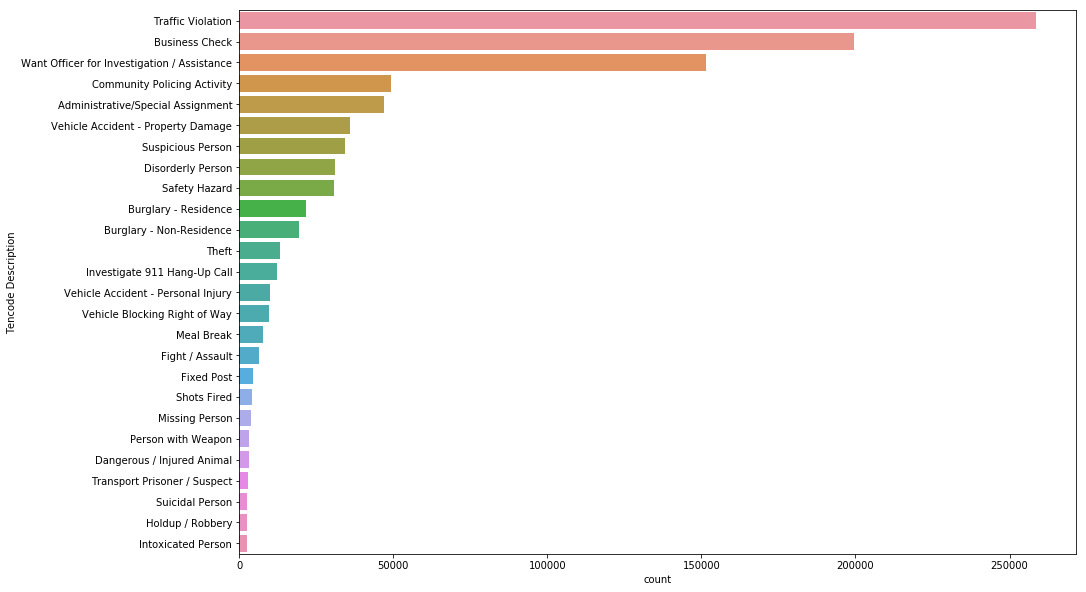

In [14]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Tencode Description', data =new_police_2016, order =new_police_2016['Tencode Description'].value_counts().iloc[:26].index)

In [15]:
not_real_crime=new_police_2016[
    (new_police_2016["Tencode Description"]=="Traffic Violation") |
    (new_police_2016["Tencode Description"]=="Business Check")|
    (new_police_2016["Tencode Description"]=="Want Officer for Investigation / Assistance")|
    (new_police_2016["Tencode Description"]=="Community Policing Activity")|
    (new_police_2016["Tencode Description"]=="Administrative/Special Assignment")|
    (new_police_2016["Tencode Description"]=="Vehicle Accident - Property Damage")|
    (new_police_2016["Tencode Description"]=="Vehicle Accident - Personal Injury")|
    (new_police_2016["Tencode Description"]=="Vehicle Blocking Right of Way")|
    (new_police_2016["Tencode Description"]=="Fixed Post")|
     (new_police_2016["Tencode Description"]=="Business Check")|
    (new_police_2016["Tencode Description"]=="Dangerous / Injured Animal")|
    (new_police_2016["Tencode Description"]=="Meal Break")]
not_real_crime["Tencode Description"].value_counts()


Traffic Violation                              258687
Business Check                                 199648
Want Officer for Investigation / Assistance    151452
Community Policing Activity                     49418
Administrative/Special Assignment               46920
Vehicle Accident - Property Damage              35800
Vehicle Accident - Personal Injury               9993
Vehicle Blocking Right of Way                    9704
Meal Break                                       7834
Fixed Post                                       4494
Dangerous / Injured Animal                       3031
Name: Tencode Description, dtype: int64

In [16]:
real_crime=new_police_2016[
    (new_police_2016["Tencode Description"]=="Suspicious Person") |
    (new_police_2016["Tencode Description"]=="Safety Hazard")|
    (new_police_2016["Tencode Description"]=="Burglary - Residence")|
    (new_police_2016["Tencode Description"]=="Burglary - Non-Residence")|
    (new_police_2016["Tencode Description"]=="Investigate 911 Hang-Up Call")|
    (new_police_2016["Tencode Description"]=="Theft")|
    (new_police_2016["Tencode Description"]=="Fight / Assault")|
    (new_police_2016["Tencode Description"]=="Shots Fired")|
    (new_police_2016["Tencode Description"]=="Missing Person")|
    (new_police_2016["Tencode Description"]=="Person with Weapon")|
    (new_police_2016["Tencode Description"]=="Transport Prisoner / Suspect")|
    (new_police_2016["Tencode Description"]=="Intoxicated Person")|
    (new_police_2016["Tencode Description"]=="Suicidal Person")|
    (new_police_2016["Tencode Description"]=="Holdup / Robbery")|
    (new_police_2016["Tencode Description"]=="Corpse / D. O. A.")|
    (new_police_2016["Tencode Description"]=="Mentally ILL Person")|
    (new_police_2016["Tencode Description"]=="Personal Relief")|
    (new_police_2016["Tencode Description"]=="Escort / Convoy")|
    (new_police_2016["Tencode Description"]=="Prowler")|
    (new_police_2016["Tencode Description"]=="Person Screaming")|
    (new_police_2016["Tencode Description"]=="Fire")|
    (new_police_2016["Tencode Description"]=="Shooting")|
    (new_police_2016["Tencode Description"]=="Hazardous Liquid / Gas Leak")|
    (new_police_2016["Tencode Description"]=="Kidnapping")|
    (new_police_2016["Tencode Description"]=="Cutting / Stabbing")|
    (new_police_2016["Tencode Description"]=="Bank Robbery")|
    (new_police_2016["Tencode Description"]=="Explosion")|
    (new_police_2016["Tencode Description"]=="Gang Activity")|
    (new_police_2016["Tencode Description"]=="Bomb Threat")|
    (new_police_2016["Tencode Description"]=="Prisoner Escapee")|
    (new_police_2016["Tencode Description"]=="Drowning")|
    (new_police_2016["Tencode Description"]=="Barricaded Suspect")
]
real_crime["Tencode Description"].value_counts()

Suspicious Person               34210
Safety Hazard                   30759
Burglary - Residence            21730
Burglary - Non-Residence        19410
Theft                           13088
Investigate 911 Hang-Up Call    12144
Fight / Assault                  6365
Shots Fired                      4167
Missing Person                   3919
Person with Weapon               3077
Transport Prisoner / Suspect     2937
Suicidal Person                  2656
Holdup / Robbery                 2639
Intoxicated Person               2639
Corpse / D. O. A.                 911
Mentally ILL Person               664
Personal Relief                   520
Escort / Convoy                   512
Prowler                           487
Person Screaming                  451
Fire                              406
Shooting                          237
Hazardous Liquid / Gas Leak       228
Cutting / Stabbing                145
Kidnapping                        145
Bank Robbery                       89
Explosion   

In [17]:
reduced_real_crime=new_police_2016[
    (new_police_2016["Tencode Description"]=="Suspicious Person") |
    (new_police_2016["Tencode Description"]=="Safety Hazard")|
    (new_police_2016["Tencode Description"]=="Burglary - Residence")|
    (new_police_2016["Tencode Description"]=="Burglary - Non-Residence")|
    (new_police_2016["Tencode Description"]=="Investigate 911 Hang-Up Call")|
    (new_police_2016["Tencode Description"]=="Theft")|
    (new_police_2016["Tencode Description"]=="Fight / Assault")|
    (new_police_2016["Tencode Description"]=="Shots Fired")|
    (new_police_2016["Tencode Description"]=="Missing Person")|
    (new_police_2016["Tencode Description"]=="Person with Weapon")|
    (new_police_2016["Tencode Description"]=="Transport Prisoner / Suspect")|
    (new_police_2016["Tencode Description"]=="Intoxicated Person")|
    (new_police_2016["Tencode Description"]=="Suicidal Person")|
    (new_police_2016["Tencode Description"]=="Holdup / Robbery")|
    (new_police_2016["Tencode Description"]=="Corpse / D. O. A.")|
    (new_police_2016["Tencode Description"]=="Mentally ILL Person")|
    (new_police_2016["Tencode Description"]=="Personal Relief")|
    (new_police_2016["Tencode Description"]=="Prowler")|
    (new_police_2016["Tencode Description"]=="Person Screaming")|
    (new_police_2016["Tencode Description"]=="Fire")|
    (new_police_2016["Tencode Description"]=="Shooting")|
    (new_police_2016["Tencode Description"]=="Cutting / Stabbing")
]

reduced_real_crime["Tencode Description"].value_counts()

Suspicious Person               34210
Safety Hazard                   30759
Burglary - Residence            21730
Burglary - Non-Residence        19410
Theft                           13088
Investigate 911 Hang-Up Call    12144
Fight / Assault                  6365
Shots Fired                      4167
Missing Person                   3919
Person with Weapon               3077
Transport Prisoner / Suspect     2937
Suicidal Person                  2656
Holdup / Robbery                 2639
Intoxicated Person               2639
Corpse / D. O. A.                 911
Mentally ILL Person               664
Personal Relief                   520
Prowler                           487
Person Screaming                  451
Fire                              406
Shooting                          237
Cutting / Stabbing                145
Name: Tencode Description, dtype: int64

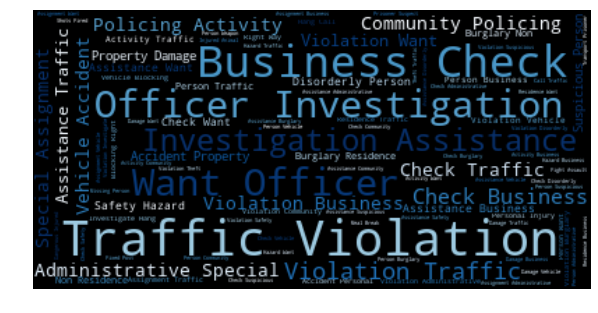

In [18]:
crime_type_code = " ".join(crime for crime in new_police_2016["Tencode Description"])                  
crime_code_wordcloud = WordCloud(colormap="Blues").generate(crime_type_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("Total crime wordcloud.png", dpi=600)

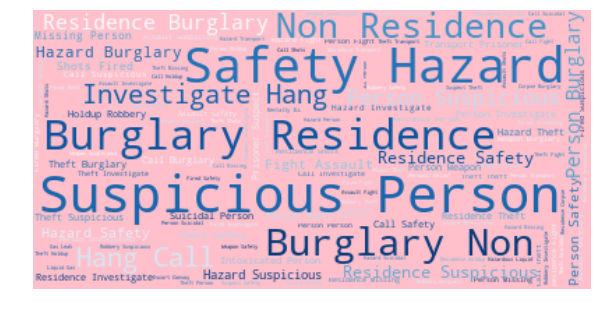

In [19]:
realcrime_type_code = " ".join(crime for crime in real_crime["Tencode Description"])                  
realcrime_code_wordcloud = WordCloud(background_color="pink",colormap="Blues").generate(realcrime_type_code)
plt.figure(figsize=[10,10])
plt.imshow(realcrime_code_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("Real crime wordcloud.png", dpi=600)

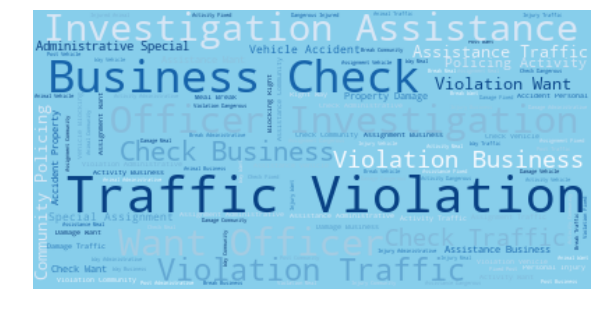

In [20]:
notrealcrime_type_code = " ".join(crime for crime in not_real_crime["Tencode Description"])                  
notrealcrime_code_wordcloud = WordCloud(background_color="skyblue",colormap="Blues").generate(notrealcrime_type_code)
plt.figure(figsize=[10,10])
plt.imshow(notrealcrime_code_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("notreal crime wordcloud.png", dpi=600)

In [31]:
# Create a new columns for Year, Day and Month, Hour
time_crime_2016=pd.DataFrame(reduced_real_crime)
time_crime_2016["Month"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[0].astype(int)
time_crime_2016["Day"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[1].astype(int)
time_crime_2016["Year"] = time_crime_2016["Call Received"].str.slice(6,11).astype(int)
time_crime_2016["Time"] = time_crime_2016["Call Received"].str.slice(11,24) 
time_crime_2016["Date"] = time_crime_2016["Call Received"].str.slice(0,10) 
#crime_data_All_DF["Hour"] = crime_data_All_DF["Time"].str.rstrip(':').str.split(':').str[0].astype(int) 
time_crime_2016.tail()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Date
1127837,PD201601315888,12/31/2016 10:45:00 PM,B,57,Fight / Assault,5,GONE ON ARRIVAL,810C,MT,36.149,-86.798,"(36.149, -86.798)",12,31,2016,10:45:00 PM,12/31/2016
1127841,PD201601315892,12/31/2016 10:48:00 PM,B,83,Shots Fired,11,DISREGARD / SIGNAL 9,621C,N,36.228,-86.796,"(36.228, -86.796)",12,31,2016,10:48:00 PM,12/31/2016
1127842,PD201601315893,12/31/2016 10:49:00 PM,B,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,331C,S,36.056,-86.715,"(36.056, -86.715)",12,31,2016,10:49:00 PM,12/31/2016
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,"(36.259, -86.713)",12,31,2016,10:51:00 PM,12/31/2016
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,"(36.258, -86.653)",12,31,2016,10:56:00 PM,12/31/2016


In [32]:
time_crime_2016["WeekDay"] = pd.to_datetime(time_crime_2016["Date"])
time_crime_2016["WeekDay"]=time_crime_2016["WeekDay"].dt.day_name()
time_crime_2016.tail()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Date,WeekDay
1127837,PD201601315888,12/31/2016 10:45:00 PM,B,57,Fight / Assault,5,GONE ON ARRIVAL,810C,MT,36.149,-86.798,"(36.149, -86.798)",12,31,2016,10:45:00 PM,12/31/2016,Saturday
1127841,PD201601315892,12/31/2016 10:48:00 PM,B,83,Shots Fired,11,DISREGARD / SIGNAL 9,621C,N,36.228,-86.796,"(36.228, -86.796)",12,31,2016,10:48:00 PM,12/31/2016,Saturday
1127842,PD201601315893,12/31/2016 10:49:00 PM,B,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,331C,S,36.056,-86.715,"(36.056, -86.715)",12,31,2016,10:49:00 PM,12/31/2016,Saturday
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,"(36.259, -86.713)",12,31,2016,10:51:00 PM,12/31/2016,Saturday
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,"(36.258, -86.653)",12,31,2016,10:56:00 PM,12/31/2016,Saturday


In [33]:
def convert_to_24(time):
    if time[-2:] == "AM" and time[:2] == "12":
        return "00"+time[2:-2]
    elif time[-2:] == "AM":
        return time[:-2]
    elif time[-2:] == "PM" and time[:2] == "12":
        return time[:-2]
    else:
        return str(int(time[:2]) + 12) + time[2:8]

In [34]:
time_crime_2016['Time'] = time_crime_2016['Time'].apply(convert_to_24)

In [35]:
time_crime_2016["Hour"] = time_crime_2016["Time"].str.slice(0,2).astype(int)
time_crime_2016.tail()

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Date,WeekDay,Hour
1127837,PD201601315888,12/31/2016 10:45:00 PM,B,57,Fight / Assault,5,GONE ON ARRIVAL,810C,MT,36.149,-86.798,"(36.149, -86.798)",12,31,2016,22:45:00,12/31/2016,Saturday,22
1127841,PD201601315892,12/31/2016 10:48:00 PM,B,83,Shots Fired,11,DISREGARD / SIGNAL 9,621C,N,36.228,-86.796,"(36.228, -86.796)",12,31,2016,22:48:00,12/31/2016,Saturday,22
1127842,PD201601315893,12/31/2016 10:49:00 PM,B,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,331C,S,36.056,-86.715,"(36.056, -86.715)",12,31,2016,22:49:00,12/31/2016,Saturday,22
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,"(36.259, -86.713)",12,31,2016,22:51:00,12/31/2016,Saturday,22
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,"(36.258, -86.653)",12,31,2016,22:56:00,12/31/2016,Saturday,22


In [36]:
#bins = [0, 7, 12, 18, 23]
#group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
bins = [-1, 7, 12, 18, 23]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening']


time_crime_2016["Hour Bin"] = pd.cut(time_crime_2016["Hour"], bins, labels=group_names)
time_crime_2016.tail(2)

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Date,WeekDay,Hour,Hour Bin
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,"(36.259, -86.713)",12,31,2016,22:51:00,12/31/2016,Saturday,22,Evening
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,"(36.258, -86.653)",12,31,2016,22:56:00,12/31/2016,Saturday,22,Evening


In [37]:
#bins = [0, 7, 12, 18, 23]
#group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
bins = [-1, 7, 12, 18, 23]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening']


time_crime_2016["Hour Bin"] = pd.cut(time_crime_2016["Hour"], bins, labels=group_names)
time_crime_2016.tail(2)

,Event Number,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Date,WeekDay,Hour,Hour Bin
1127846,PD201601315897,12/31/2016 10:51:00 PM,B,57,Fight / Assault,6,ASSISTED OTHER UNIT,711C,M,36.259,-86.713,"(36.259, -86.713)",12,31,2016,22:51:00,12/31/2016,Saturday,22,Evening
1127852,PD201601315908,12/31/2016 10:56:00 PM,B,40,Suspicious Person,5,GONE ON ARRIVAL,523C,H,36.258,-86.653,"(36.258, -86.653)",12,31,2016,22:56:00,12/31/2016,Saturday,22,Evening


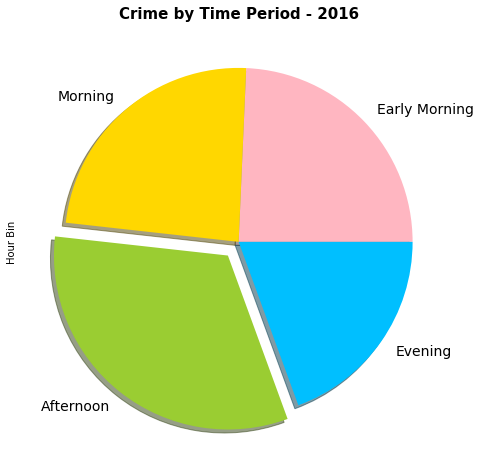

In [38]:
day_order=["Early Morning", "Morning", "Afternoon", "Evening"]
no_crimes_day=time_crime_2016["Hour Bin"].value_counts().reindex(day_order)
fig, ax = plt.subplots()
explode = (0, 0, 0.1, 0)
no_crimes_day.plot(ax=ax,kind='pie', figsize=(10,8), fontsize = 14, shadow=True, explode=explode, colors = ("lightpink","gold","yellowgreen","deepskyblue"))
plt.title("Crime by Time Period - 2016",fontsize=15, weight='bold')
plt.savefig("TimePeriod.png")

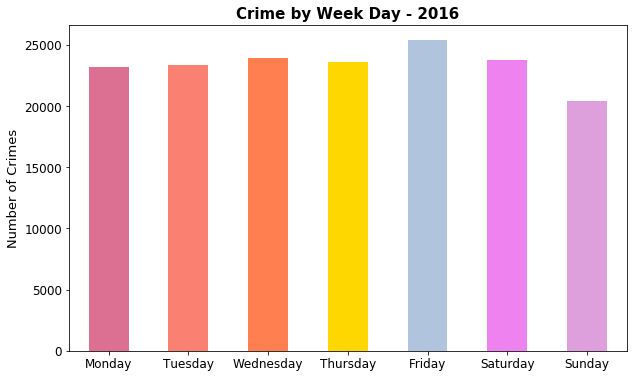

In [39]:
week_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
No_crimes_week=time_crime_2016["WeekDay"].value_counts().reindex(week_order)
fig, ax = plt.subplots()
No_crimes_week.plot(ax=ax, kind='bar', figsize=(10,6), rot= 360, fontsize= 12, color = ("palevioletred","salmon","coral","gold","lightsteelblue","violet","plum"))
plt.title("Crime by Week Day - 2016",fontsize=15, weight='bold')
plt.ylabel("Number of Crimes",fontsize=13)
plt.savefig("WeekDay.png")

In [156]:
No_crimes_month=time_crime_2016['Month'].value_counts().sort_index()
No_crimes_month

01    13260
02    11774
03    13286
04    13520
05    14136
06    14918
07    15083
08    14276
09    14030
10    13872
11    13000
12    13580
Name: Month, dtype: int64

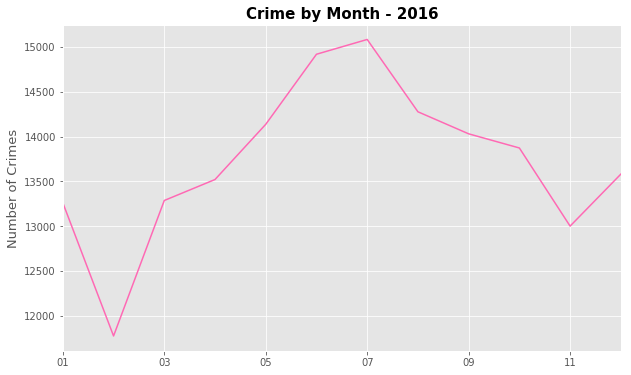

In [157]:
fig, ax = plt.subplots()
No_crimes_month.plot(ax=ax, kind='line', color="hotpink",figsize=(10,6))
plt.title("Crime by Month - 2016",fontsize=15, weight='bold')
plt.ylabel("Number of Crimes",fontsize=13)
plt.savefig("Real crime Crime by Month.png", dpi=600)

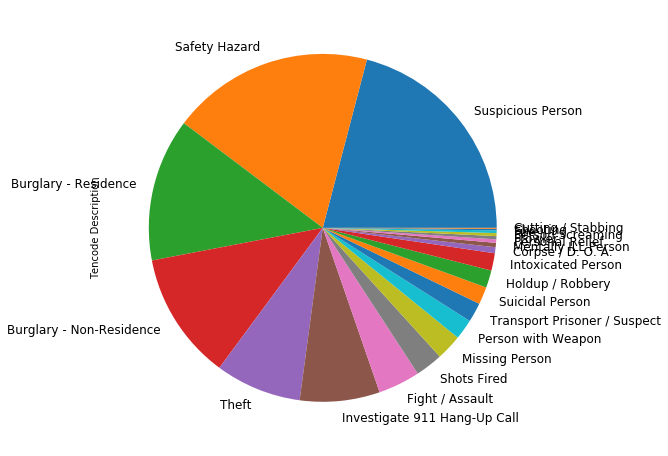

In [40]:
#Pie chart of Tencode descriptions
time_crime_2016['Tencode Description'].value_counts().plot(kind='pie', figsize=(10,8), fontsize = 12)


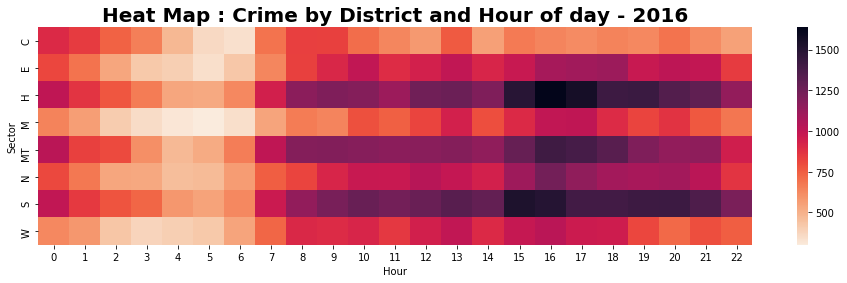

In [42]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Sector', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode Description"}, inplace=True)
df_h = df_gb_2016.pivot("Sector", "Hour", "Tencode Description")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by District and Hour of day - 2016', fontsize=20, weight='bold')
plt.savefig ("heatmap_sector_2016.png")
plt.show()

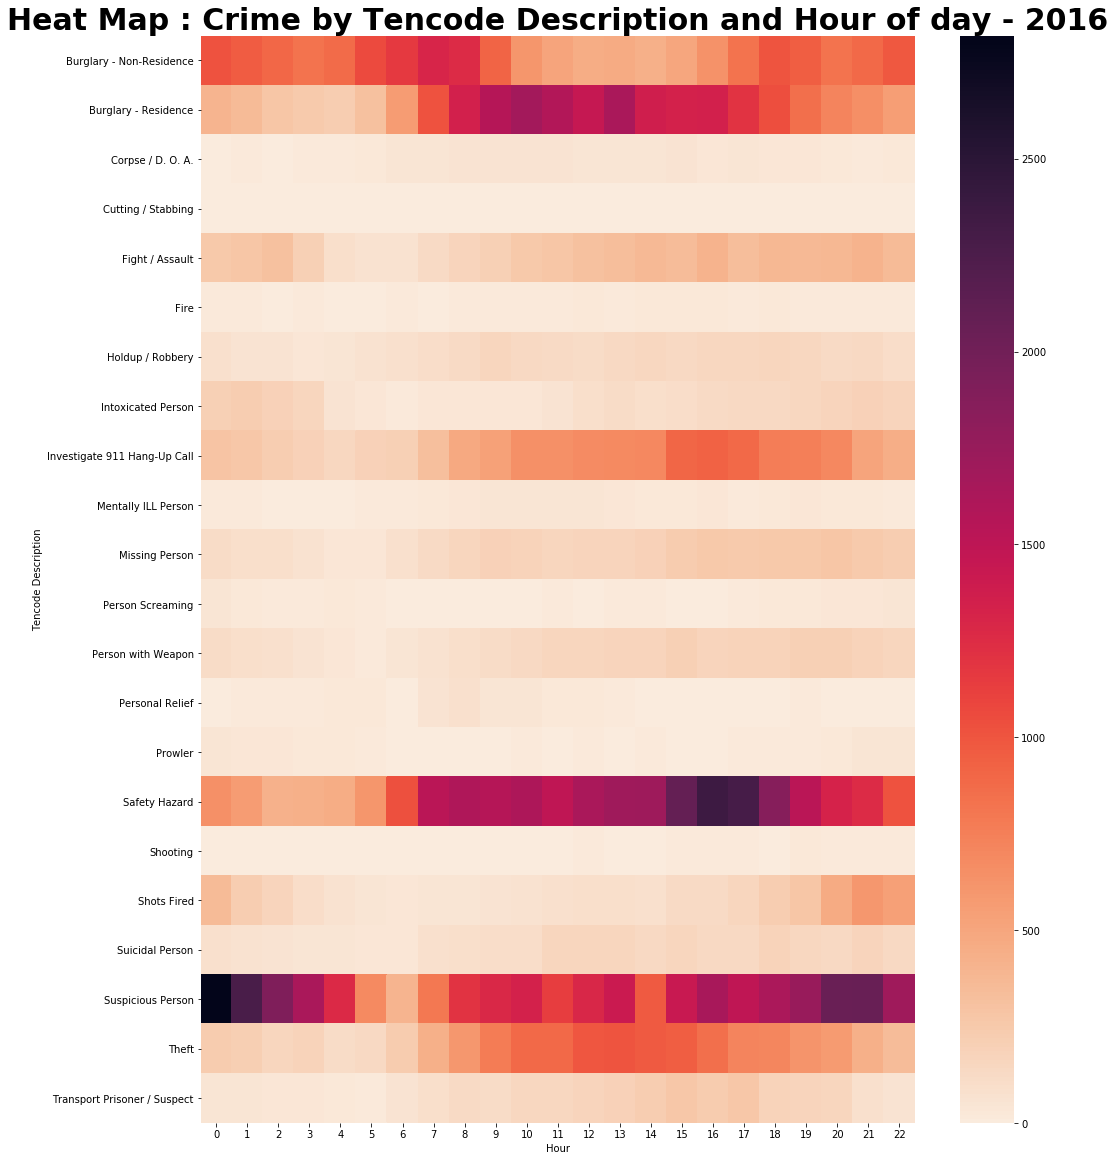

In [43]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Hour", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Hour of day - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_time_2016.png")
plt.show(5)

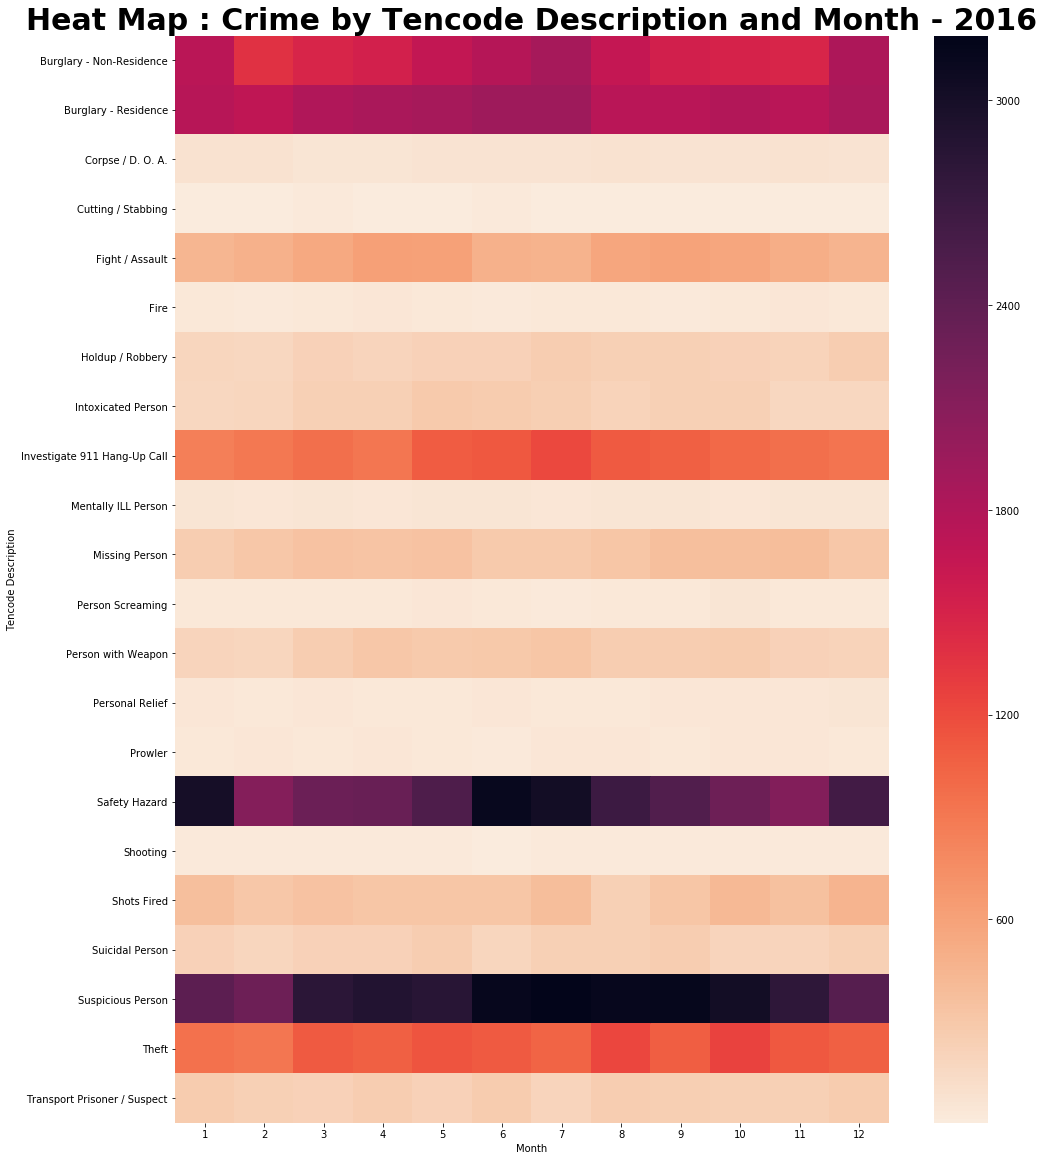

In [44]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Month']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Month", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Month - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_month_2016.png")
plt.show(5)

In [81]:
locations = real_crime.groupby('Tencode Description').first()

In [82]:
popup_text = """Tencode Description : {}<br
                Mapped Location : {}<br>"""

In [47]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Mapped Location']]
new_locations.head()

nashville_map = folium.Map(location=[36.168,-86.779],
                        zoom_start=15,
                        tiles="Stamen Terrain")
nashville_map

for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Tencode Description : {}<br
                Mapped Location : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )

    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(nashville_map)

nashville_map 

In [48]:
unique_locations = real_crime['Mapped Location'].value_counts()
unique_locations.head()

(36.161, -86.777)    572
(36.131, -86.907)    407
(36.176, -86.608)    364
(36.162, -86.776)    358
(36.154, -86.778)    347
Name: Mapped Location, dtype: int64

In [49]:
#unique_locations.index

Index(['(36.161, -86.777)', '(36.131, -86.907)', '(36.176, -86.608)',
       '(36.162, -86.776)', '(36.154, -86.778)', '(36.077, -86.721)',
       '(36.244, -86.762)', '(36.153, -86.809)', '(36.082, -86.726)',
       '(36.166, -86.807)',
       ...
       '(36.168, -86.695)', '(36.046, -86.741)', '(36.11, -86.859)',
       '(36.33, -86.785)', '(36.213, -86.632)', '(36.228, -86.733)',
       '(36.176, -86.725)', '(36.158, -86.646)', '(36.079, -86.688)',
       '(36.083, -86.889)'],
      dtype='object', length=29721)

In [83]:
real_crime_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
real_crime_index.index = range(len(unique_locations))
real_crime_index.head()

,Raw_String,ValueCount
0,"(36.161, -86.777)",572
1,"(36.131, -86.907)",407
2,"(36.176, -86.608)",364
3,"(36.162, -86.776)",358
4,"(36.154, -86.778)",347


In [84]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [85]:
real_crime_index['LocationCoord'] = real_crime_index['Raw_String'].apply(Location_extractor)
real_crime_index['LocationCoord'].head()

0    (36.161, -86.777)
1    (36.131, -86.907)
2    (36.176, -86.608)
3    (36.162, -86.776)
4    (36.154, -86.778)
Name: LocationCoord, dtype: object

In [86]:
real_crime_index  = real_crime_index.drop(columns=['Raw_String'], axis = 1)
real_crime_index.head()

,ValueCount,LocationCoord
0,572,"(36.161, -86.777)"
1,407,"(36.131, -86.907)"
2,364,"(36.176, -86.608)"
3,358,"(36.162, -86.776)"
4,347,"(36.154, -86.778)"


In [54]:
#%%time

nashville_map_crime = folium.Map(location=[36.168, -86.779],
                        zoom_start=13,
                       tiles="Stamen Terrain")

for i in range(500):
    lat = real_crime_index['LocationCoord'].iloc[i][0]
    long = real_crime_index['LocationCoord'].iloc[i][1]
    radius = real_crime_index['ValueCount'].iloc[i] / 45
    
    if real_crime_index['ValueCount'].iloc[i] > 200:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               real_crime_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(nashville_map_crime)


nashville_map_crime.save("nashville_map_crime.html")

nashville_map_crime


In [55]:
anova = pd.read_csv('2013-2017 Weekday Summary BurglaryRes Sorted.csv')
anova

,Year,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,2013 Burglary - Residence,2952,3584,3590,3727,3720,3876,3201
1,2014 Burglary - Residence,3021,3490,3586,3691,3683,3810,3371
2,2015 Burglary - Residence,3103,3639,3796,3737,3907,3934,3503
3,2016 Burglary - Residence,2707,3048,3164,3168,3120,3400,3123
4,2017 Burglary - Residence,2566,2770,2939,2967,3069,3089,2893


In [56]:
stats.ttest_ind(anova["Sunday"], anova["Friday"], equal_var=False)

Ttest_indResult(statistic=-3.9270787487217964, pvalue=0.006274111960673643)

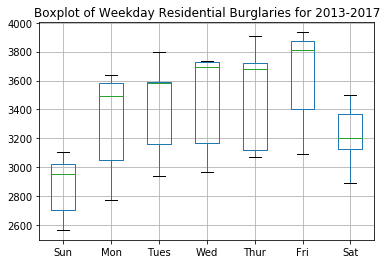

In [58]:
boxplotimage = pd.DataFrame.boxplot(anova)
boxplotimage.set_xticklabels(('Sun', 'Mon', 'Tues', 'Wed','Thur', 'Fri', 'Sat'))
boxplotimage.set_title('Boxplot of Weekday Residential Burglaries for 2013-2017')

fig = boxplotimage.get_figure()
fig.savefig("boxplot_burg_res_year.png")

Text(0.5, 1.0, 'Weekday Residential Burglaries for 2013-2017')

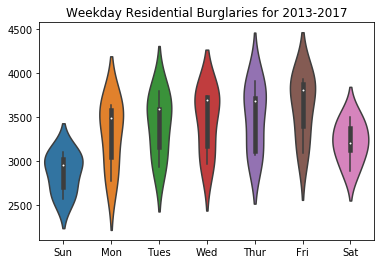

In [59]:
violinplot = sns.violinplot(data=anova)
violinplot.set_xticklabels(('Sun', 'Mon', 'Tues', 'Wed','Thur', 'Fri', 'Sat'))
violinplot.set_title('Weekday Residential Burglaries for 2013-2017')

In [60]:
stats.ttest_ind(anova["Sunday"], anova["Friday"], equal_var=False)

Ttest_indResult(statistic=-3.9270787487217964, pvalue=0.006274111960673643)

In [63]:
sunday = anova["Sunday"]
sunday = pd.DataFrame(sunday)
monday = anova["Monday"]
monday = pd.DataFrame(monday)
tuesday = anova["Tuesday"]
tuesday = pd.DataFrame(tuesday)
wednesday = anova["Wednesday"]
wednesday = pd.DataFrame(wednesday)
thursday = anova["Thursday"]
thursday = pd.DataFrame(thursday)
friday = anova["Friday"]
friday = pd.DataFrame(friday)
saturday = anova["Saturday"]
saturday = pd.DataFrame(saturday)

In [64]:
# Perform the ANOVA
stats.f_oneway(sunday, monday, tuesday, wednesday, thursday, friday, saturday)

F_onewayResult(statistic=array([2.69456886]), pvalue=array([0.03419815]))

In [65]:
# P-value < .05.  Therefore, reject the null that all means are statiscally
# equivalent.  Look at the means

In [66]:
anovamean = anova.mean()
anovamean

Sunday       2869.8
Monday       3306.2
Tuesday      3415.0
Wednesday    3458.0
Thursday     3499.8
Friday       3621.8
Saturday     3218.2
dtype: float64

In [67]:
anovastdev = np.std(anova)
anovastdev

Sunday       201.394538
Monday       339.378491
Tuesday      314.516772
Wednesday    325.475652
Thursday     339.911400
Friday       325.753526
Saturday     209.558011
dtype: float64

In [68]:
# Perform the ANOVA - weekday only
stats.f_oneway(monday, tuesday, wednesday, thursday, friday)

F_onewayResult(statistic=array([0.49333365]), pvalue=array([0.74071292]))

In [69]:
# P value for weekday anova test > .05.  Accept the null hypothesis that
# all weekday means are statistically equivalent.

In [70]:
# If you are going to leave home with your door unlocked.  Do in on Sunday!

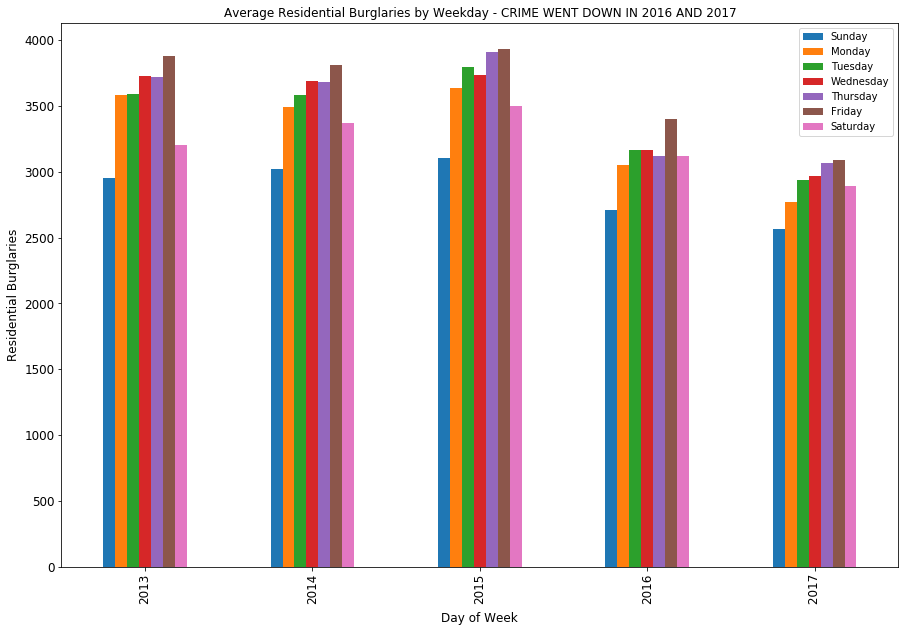

In [71]:
ax = anova[['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']].plot(kind='bar', title ="Average Residential Burglaries by Weekday - CRIME WENT DOWN IN 2016 AND 2017", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Day of Week", fontsize=12)
ax.set_ylabel("Residential Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Weekly_burg_res_year.png")

In [72]:
#pivot_df = df.pivot(index='Year', columns='Month', values='Value')
#pivot_df

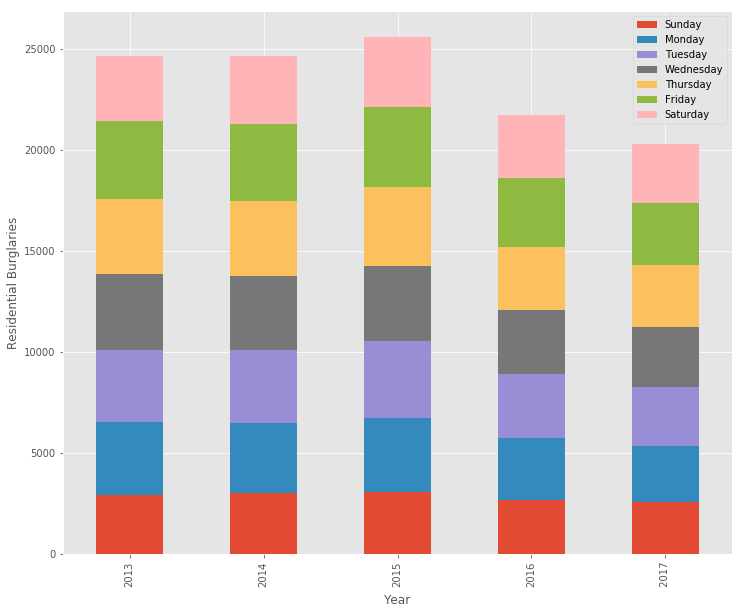

In [73]:
plt.style.use('ggplot')

#Note: .loc[:,['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']] is used here to rearrange the layer ordering
ax=anova.loc[:,['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']].plot.bar(stacked=True, figsize=(12,10))
ax.set_xlabel('Year', fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
ax.set_ylabel("Residential Burglaries", fontsize=12)

fig = ax.get_figure()
fig.savefig("Weekly_burg_res_year.png")

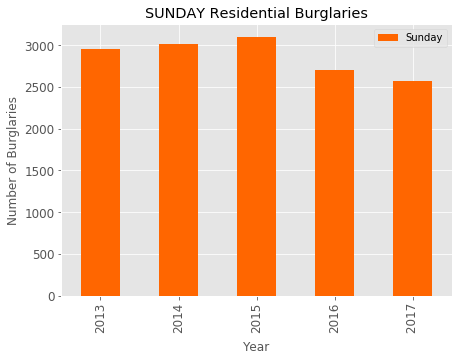

In [74]:
ax = sunday[['Sunday']].plot(kind='bar', title ="SUNDAY Residential Burglaries", color = "#ff6600", figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Weekly_burg_res_year.png")

fig = ax.get_figure()
fig.savefig("Sunday_burg_res_year.png")

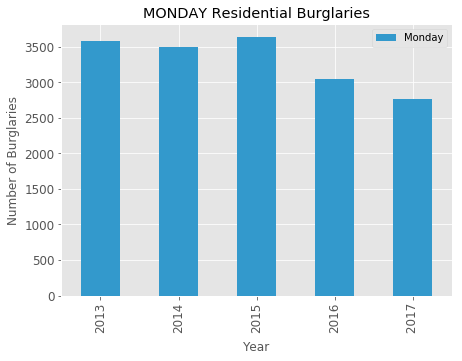

In [75]:
ax = monday[['Monday']].plot(kind='bar', title ="MONDAY Residential Burglaries", color = "#3399cc", figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Monday_burg_res_year.png")

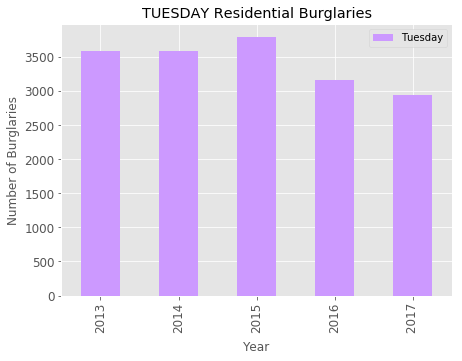

In [76]:
ax = tuesday[['Tuesday']].plot(kind='bar', title ="TUESDAY Residential Burglaries", color = '#cc99ff', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Tuesday_burg_res_year.png")

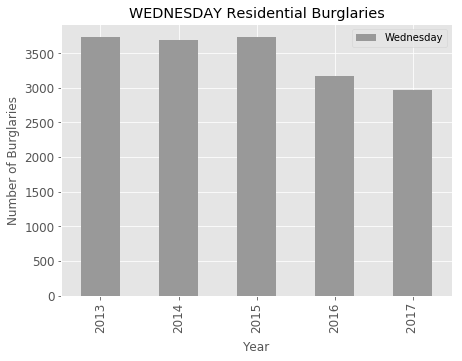

In [77]:
ax = wednesday[['Wednesday']].plot(kind='bar', title ="WEDNESDAY Residential Burglaries", color = '#999999', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Wednesday_burg_res_year.png")

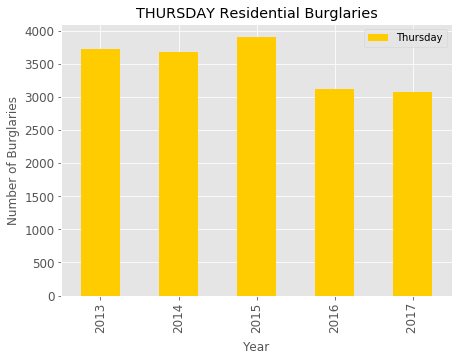

In [78]:
ax = thursday[['Thursday']].plot(kind='bar', title ="THURSDAY Residential Burglaries", color = '#ffcc00', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Thursday_burg_res_year.png")

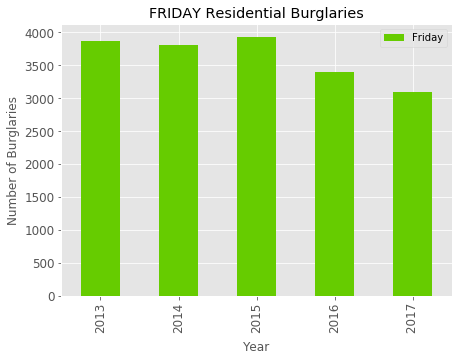

In [79]:
ax = friday[['Friday']].plot(kind='bar', title ="FRIDAY Residential Burglaries", color = '#66cc00', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))
plt.show()

fig = ax.get_figure()
fig.savefig("Friday_burg_res_year.png")

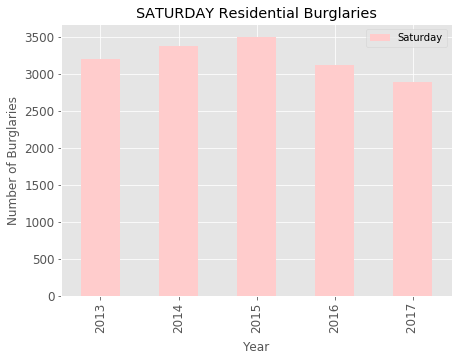

In [80]:
ax = saturday[['Saturday']].plot(kind='bar', title ="SATURDAY Residential Burglaries", color = '#ffcccc', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Burglaries", fontsize=12)
ax.set_xticklabels(('2013', '2014', '2015', '2016',' 2017'))

fig = ax.get_figure()
fig.savefig("Saturday_burg_res_year.png")